# Data Exploration

In [48]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 500)

plt.style.use('ggplot')

### Trends

In [2]:
# globale und regionale Trends der U5MR - mit dem großen raw_merged dataset
raw_merged_df = pd.read_csv("../00_data/1_interim/raw_merged_data.csv")
raw_merged_df["child_mortality_igme"] = raw_merged_df["child_mortality_igme"] * 10

world_regions = pd.read_csv("../00_data/1_interim/world-regions-worldbank.csv")
world_regions = world_regions.rename(columns={"Entity": "entity", "Year": "year"})

#### Child Mortality Trend Global

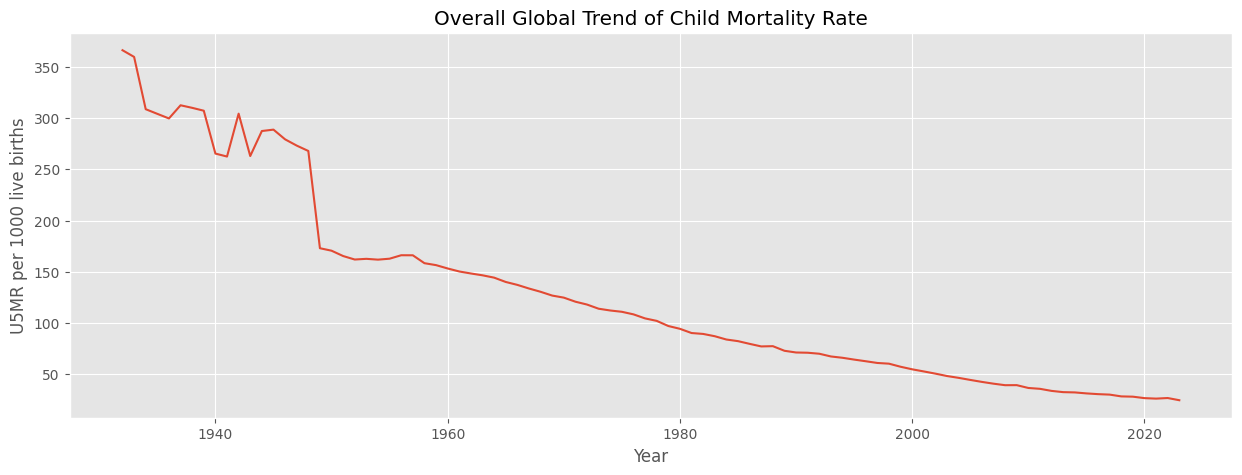

In [3]:
plt.figure(figsize=(15,5))
sns.lineplot(data=raw_merged_df, x="Year", y="child_mortality_igme", errorbar=None)
plt.ylabel("U5MR per 1000 live births")
plt.title("Overall Global Trend of Child Mortality Rate")
plt.show()

#### Child Mortality Rate per World Regions

In [4]:
df_wr = pd.merge(raw_merged_df, world_regions, on="Code", how="left")

In [127]:
numeric_cols = df_wr.select_dtypes(include=np.number).columns.tolist()
regions_groups = df_wr.groupby(["World regions according to WB", "Year"])["child_mortality_igme"].median()
regions_groups = regions_groups.reset_index()

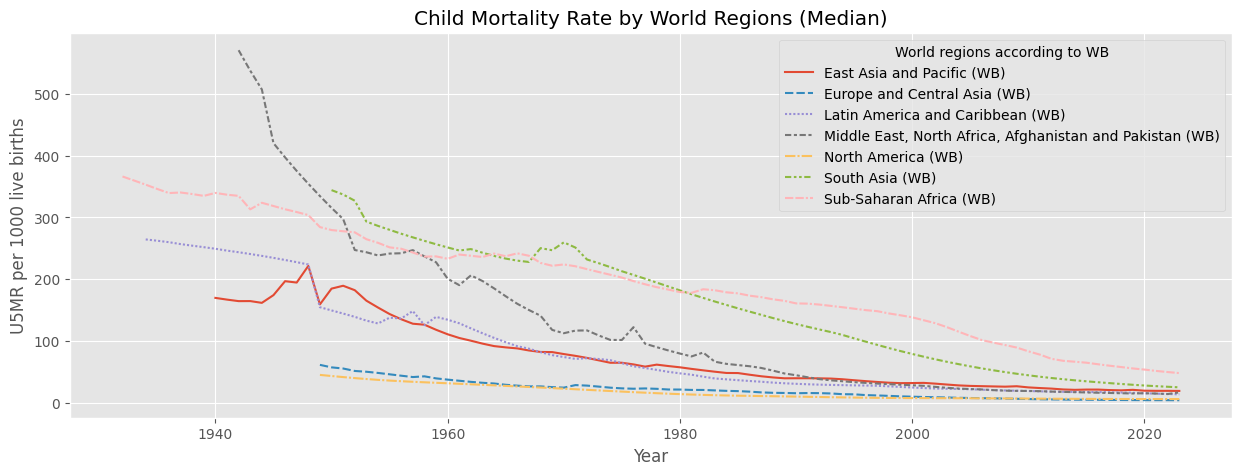

In [128]:
plt.figure(figsize=(15,5))
sns.lineplot(data=regions_groups, x="Year", y="child_mortality_igme", hue="World regions according to WB", style="World regions according to WB")
plt.ylabel("U5MR per 1000 live births")
plt.title("Child Mortality Rate by World Regions (Median)")
plt.show()

### Dataset Infos

#### Data First Insights (limited 6-year dataframe 2013-2018)

In [7]:
merged_df = pd.read_csv("../00_data/1_interim/merged_data.csv", index_col=["Code", "Year"])
filtered_df_01 = pd.read_csv("../00_data/1_interim/filtered_data_01.csv", index_col=["Code", "Year"])

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1200 entries, ('AFG', np.int64(2013)) to ('ZWE', np.int64(2018))
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    1200 non-null   object 
 1   child_mortality_igme                      1200 non-null   float64
 2   annual_healthcare_expenditure_per_capita  1142 non-null   float64
 3   gdp_per_capita_worldbank                  1128 non-null   float64
 4   nurses_and_midwives_per_1000_people       862 non-null    float64
 5   physicians_per_1000_people                753 non-null    float64
 6   prevalence_of_undernourishment            1002 non-null   float64
 7   share_of_population_urban                 1170 non-null   float64
 8   share_without_improved_water              1174 non-null   float64
 9   vaccination_coverage_who_unicef           1164 non-null   float64


In [9]:
merged_df.describe()
# highest U5MR in whole df: 278 deaths per 1000 live births, lowest is 1,7 deaths per 1000 births
# in 25% of the data, U5MR is above 46 per 1000 births
# for half of the data, U5MR is above 17,5 per 1000 birth

,child_mortality_igme,annual_healthcare_expenditure_per_capita,gdp_per_capita_worldbank,nurses_and_midwives_per_1000_people,physicians_per_1000_people,prevalence_of_undernourishment,share_of_population_urban,share_without_improved_water,vaccination_coverage_who_unicef,years_of_schooling
count,1200.000000,1142.000000,1128.000000,862.000000,753.000000,1002.000000,1170.000000,1174.000000,1164.000000,1132.000000
mean,30.641786,1384.140573,22588.782826,4.730940,2.151936,9.836627,58.278545,8.766518,88.289519,8.339549
std,33.522547,1715.310940,23416.547441,4.094242,1.666007,10.225440,23.035379,11.775164,13.337069,3.547940
min,1.749197,25.303010,868.555500,0.101300,0.013000,2.500000,11.482000,0.000000,19.000000,0.672197
25%,7.655497,207.347112,5344.745225,1.349250,0.603000,2.500000,40.047000,0.494207,84.750000,5.268316
50%,17.566985,685.098850,14441.918000,3.913000,2.148000,5.850000,58.026500,3.018631,93.000000,9.004750
75%,46.153776,1805.880075,31796.610500,6.734750,3.299000,13.400000,77.251750,13.830902,97.000000,11.170749
max,278.187220,10182.256000,136454.000000,20.830000,8.568000,62.600000,100.000000,57.326244,99.000000,14.140000


#### Histograms

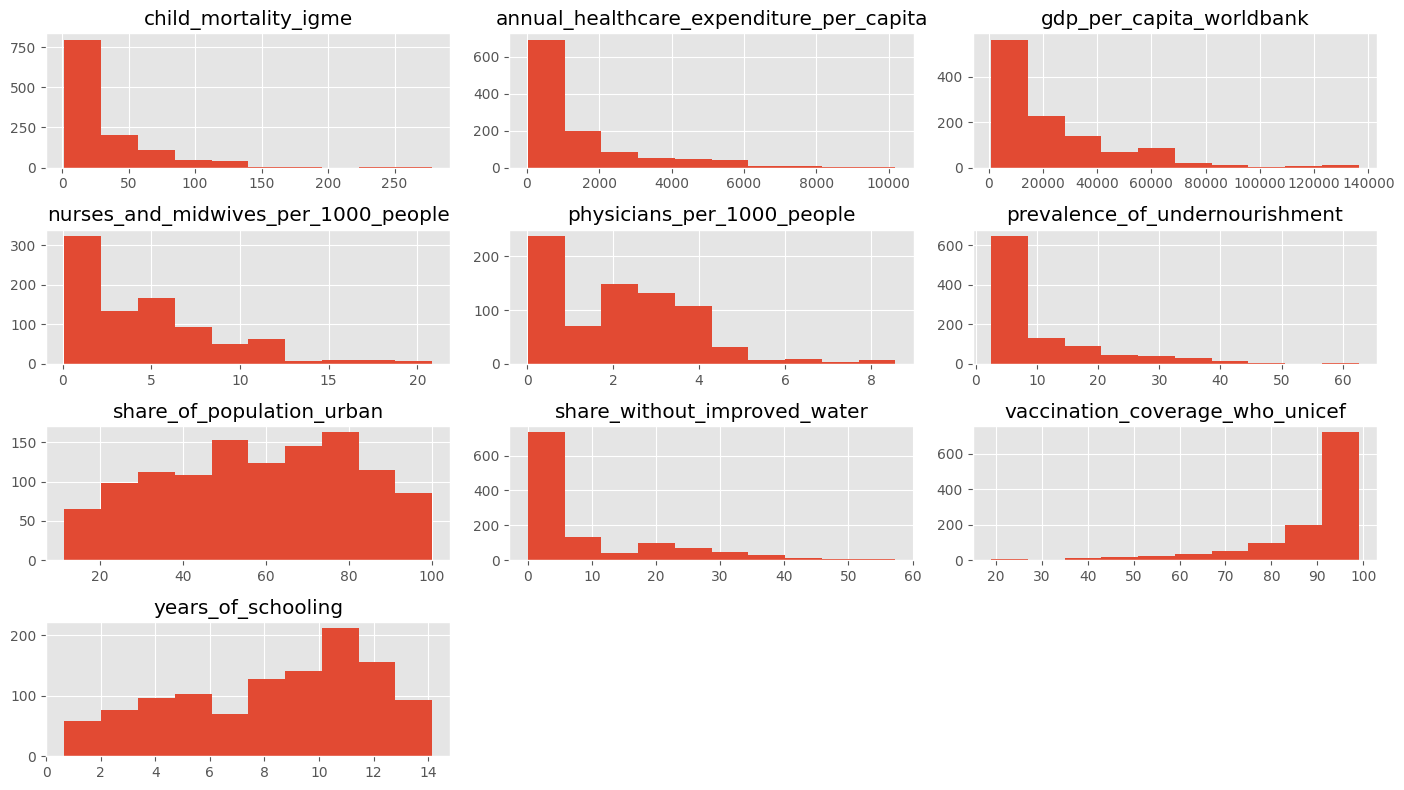

In [19]:
#Histograms of label & features
#FINDING: Label + 6 features haben rechtsschiefe Verteilung (viele Datenpunkte sammeln sich im linken Bereich an)
merged_df.hist(figsize=(14,8))
plt.tight_layout()
plt.show()

In [20]:
#Skewness of each numeric column
merged_df.skew(numeric_only=True)

child_mortality_igme                        2.152041
annual_healthcare_expenditure_per_capita    1.959528
gdp_per_capita_worldbank                    1.848820
nurses_and_midwives_per_1000_people         1.222304
physicians_per_1000_people                  0.711832
prevalence_of_undernourishment              1.954790
share_of_population_urban                  -0.115794
share_without_improved_water                1.558764
vaccination_coverage_who_unicef            -2.019852
years_of_schooling                         -0.446320
dtype: float64

#### Boxplots

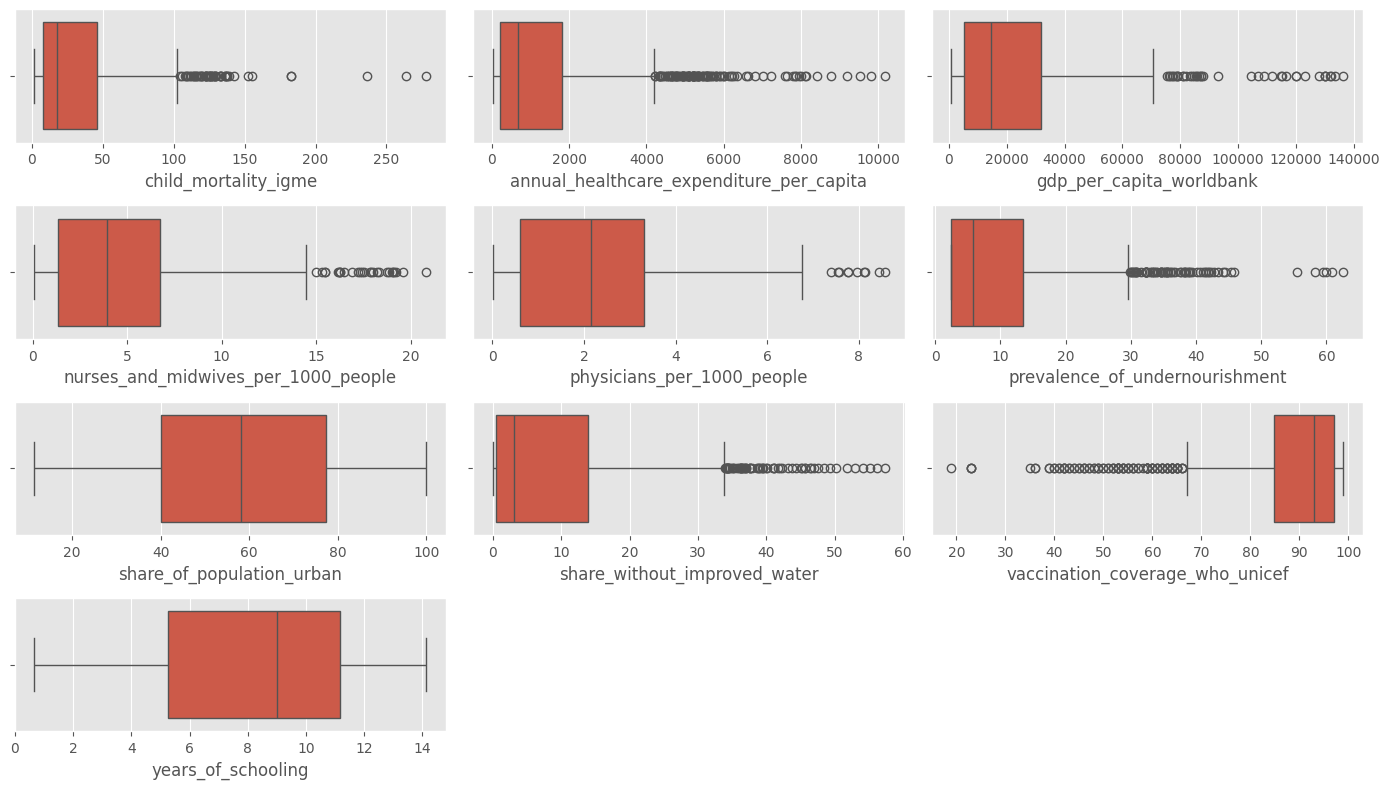

In [84]:
#sns.boxplot(x=merged_df["child_mortality_igme"])
variables = merged_df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(14,8))
for id, c in enumerate(variables):
    plt.subplot(4,3, id+1)
    sns.boxplot(x=merged_df[c])
    plt.tight_layout()
plt.show()

#NOTE:
# as the histograms show, the boxplots also visualize the skewness of the many columns
# share_urban & years_schooling are only ones that are normal distributed & no outliers
# since there are high disparity between countries globally, its not surprising & shows the realistic differences

### Explorative Analysis - First Insights

#### Scatterplots - Relationships between Label & Features

In [85]:
#Scatterplots - Group by Feature Aspect
def scatterplots(df, features, cols_num):
    fig, axs = plt.subplots(ncols=cols_num, figsize=(18, 6))
    for id, a in enumerate(axs):
        sns.scatterplot(data=df, x="child_mortality_igme", y=features[id], hue=features[id], 
                        size=features[id], sizes=(25, 100), ax=axs[id])
    plt.show()

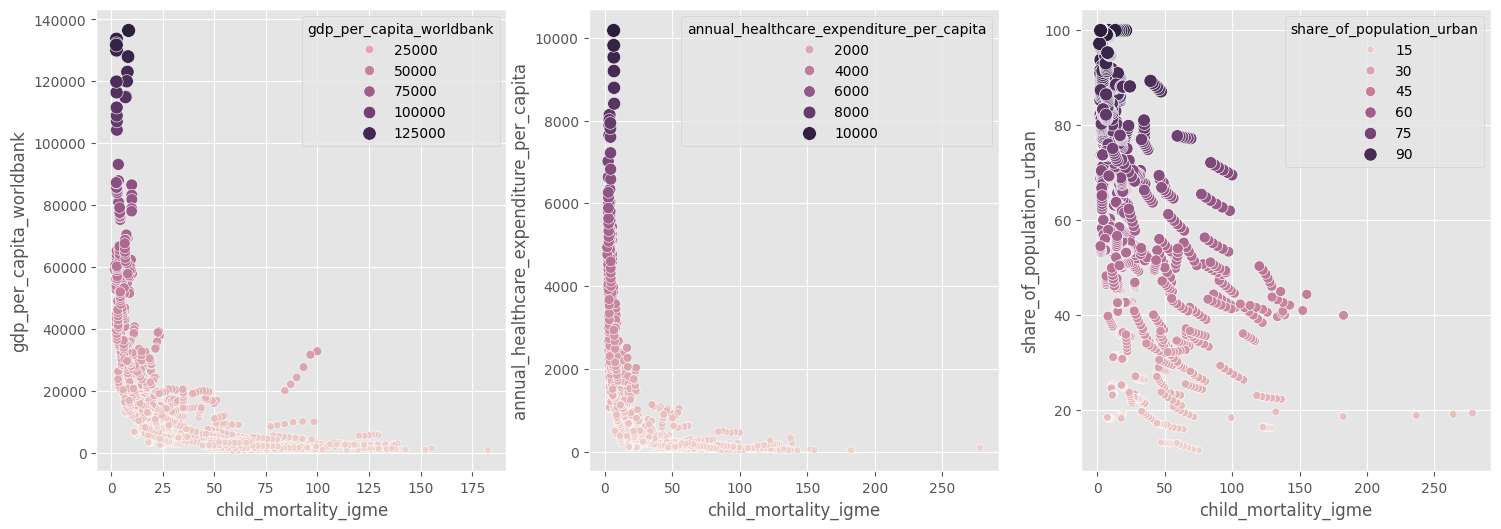

In [86]:
# relationship between label and features (economic/financial, dempgrafic related)
socio_econ = ["gdp_per_capita_worldbank", "annual_healthcare_expenditure_per_capita", "share_of_population_urban"]
scatterplots(merged_df, socio_econ, 3)

#NOTES:
# similar scatter for gdp-u5mr und for annual_healthcare-u5mr (logarithmusähnliche Kurve, negative correlation)
# share_population_urban-u5mr negative correlation 
# many countries near 0 for u5mr

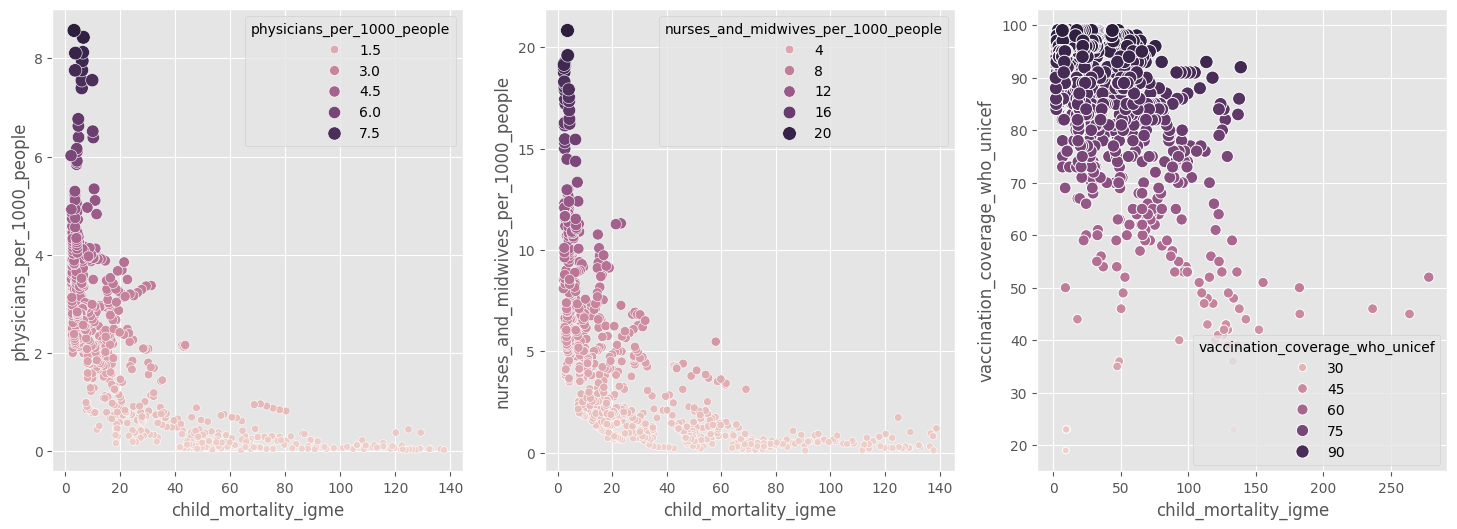

In [87]:
# relationship between label and features (health/medical related)
health_medical = ["physicians_per_1000_people", "nurses_and_midwives_per_1000_people", "vaccination_coverage_who_unicef"]
scatterplots(merged_df, health_medical, 3)

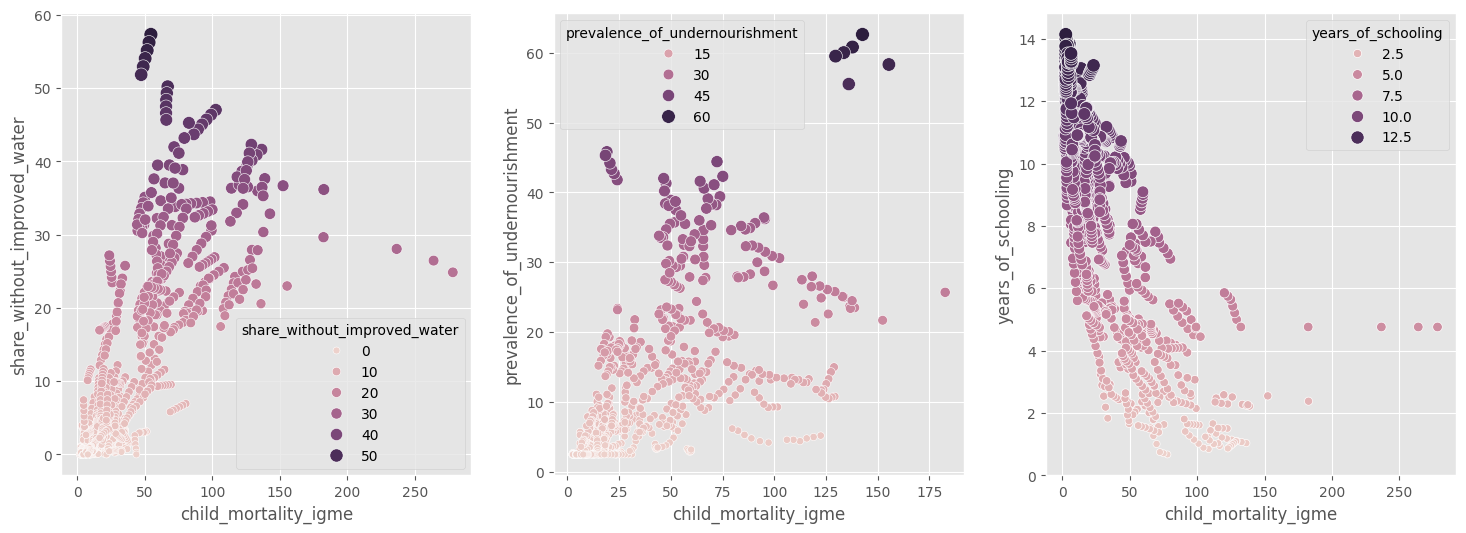

In [88]:
# relationship between label and features (living/development, hygiene related)
living_development = ["share_without_improved_water", "prevalence_of_undernourishment", "years_of_schooling"]
scatterplots(merged_df, living_development, 3)

#### Correlations

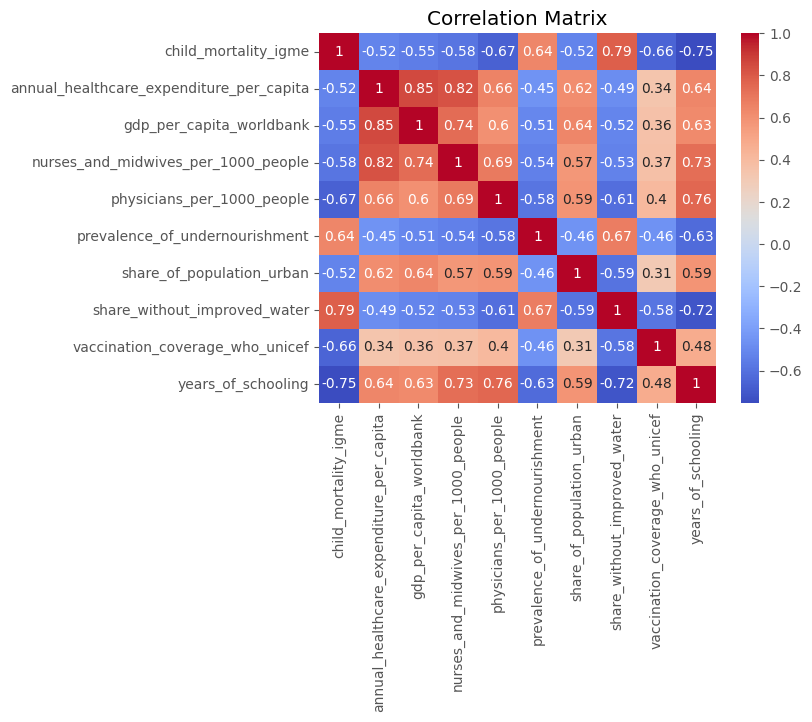

In [89]:
#show correlations between features and label
# starke Korrelationen Label-Feature: share_without_improved_water, years_of_schooling
# mäßig-starke Korrelationen Label-Feature: physicians_per_1000, undernourishment, vaccination_coverage, nurses_midwives_per_1000
# mäßige Korrelationen Label-Feature: annual_healthcare_exp, gdp_per_capita, share_of_pop_urban

# starke Korrelationen Feature-Feature: gdp & annual_healthcare_exp (0.85), nurses_midwives & annual_healthcare_exp (0.82)
# mäßig-starke Korr. Feature-Feature: physicians_per_1000 & years_schooling (0.76), nurses_midwives & gdp_per_capita (0.74),
                                      #nurses_midwives & years_schooling (0.73)
features_corr = merged_df.copy()
features_corr = features_corr.drop(columns=["Entity"])
corr = features_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Check Missing Values

In [91]:
# Null values count
def count_missing_values(df):
    print(f"DataFrame has {df.isna().sum().sum()} null values in total.\n")
    null_count = df.isna().sum()
    null_count_perc = round((null_count / len(df)) * 100, 2)
    print(f"Missing Values - count for each column:\n\n{null_count}\n\nPercentage of Missing values:\n\n{null_count_perc}")

count_missing_values(merged_df)

DataFrame has 1273 null values in total.

Missing Values - count for each column:

Entity                                        0
child_mortality_igme                          0
annual_healthcare_expenditure_per_capita     58
gdp_per_capita_worldbank                     72
nurses_and_midwives_per_1000_people         338
physicians_per_1000_people                  447
prevalence_of_undernourishment              198
share_of_population_urban                    30
share_without_improved_water                 26
vaccination_coverage_who_unicef              36
years_of_schooling                           68
dtype: int64

Percentage of Missing values:

Entity                                       0.00
child_mortality_igme                         0.00
annual_healthcare_expenditure_per_capita     4.83
gdp_per_capita_worldbank                     6.00
nurses_and_midwives_per_1000_people         28.17
physicians_per_1000_people                  37.25
prevalence_of_undernourishment              

### Missing Values by Code (Country ID)

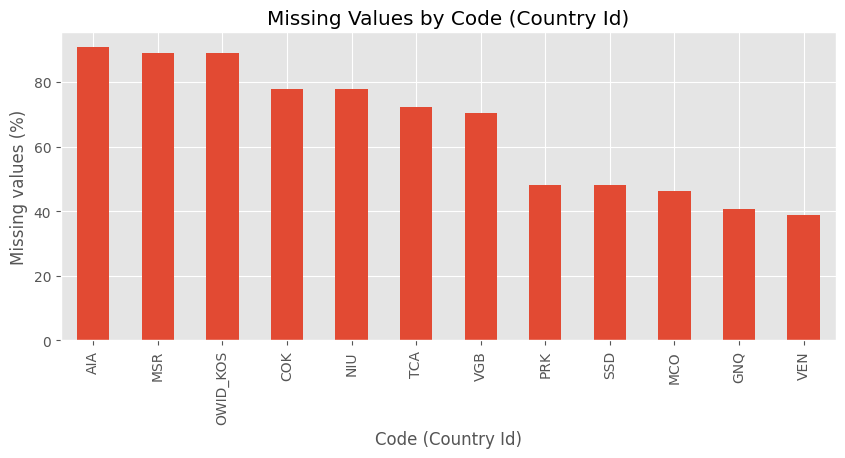

Top 12 Countries with most missing values:
Code
AIA         90.74
MSR         88.89
OWID_KOS    88.89
COK         77.78
NIU         77.78
TCA         72.22
VGB         70.37
PRK         48.15
SSD         48.15
MCO         46.30
GNQ         40.74
VEN         38.89
Name: total_missing_%, dtype: float64


In [111]:
# Missing Values by Country ID (Code)
rows_per_country = merged_df.groupby(level=0).size().iloc[0]
all_missing_values = merged_df.isnull().groupby(level=0).sum()
all_missing_values["total_missing"] = all_missing_values.sum(axis=1)
all_missing_values["total_missing_%"] = round( ( all_missing_values["total_missing"] / (9 * rows_per_country) ) * 100, 2)
#plot top 12 countries with most missing values
top_missing_countries = all_missing_values.sort_values(ascending=False, by="total_missing")
top_12_missing = top_missing_countries["total_missing_%"].head(12)
top_12_missing.plot(kind="bar", figsize=(10,4))

plt.xlabel("Code (Country Id)")
plt.ylabel("Missing values (%)")
plt.title("Missing Values by Code (Country Id)")
plt.show()
print(f"Top 12 Countries with most missing values:\n{top_12_missing}")

In [93]:
#Missing values after first filtered df (7 countries excluded)
count_missing_values(filtered_df_01)

DataFrame has 967 null values in total.

Missing Values - count for each column:

Entity                                        0
child_mortality_igme                          0
annual_healthcare_expenditure_per_capita     16
gdp_per_capita_worldbank                     42
nurses_and_midwives_per_1000_people         300
physicians_per_1000_people                  405
prevalence_of_undernourishment              156
share_of_population_urban                     0
share_without_improved_water                 16
vaccination_coverage_who_unicef               6
years_of_schooling                           26
dtype: int64

Percentage of Missing values:

Entity                                       0.00
child_mortality_igme                         0.00
annual_healthcare_expenditure_per_capita     1.38
gdp_per_capita_worldbank                     3.63
nurses_and_midwives_per_1000_people         25.91
physicians_per_1000_people                  34.97
prevalence_of_undernourishment              1

### Missing Values per Column per Country

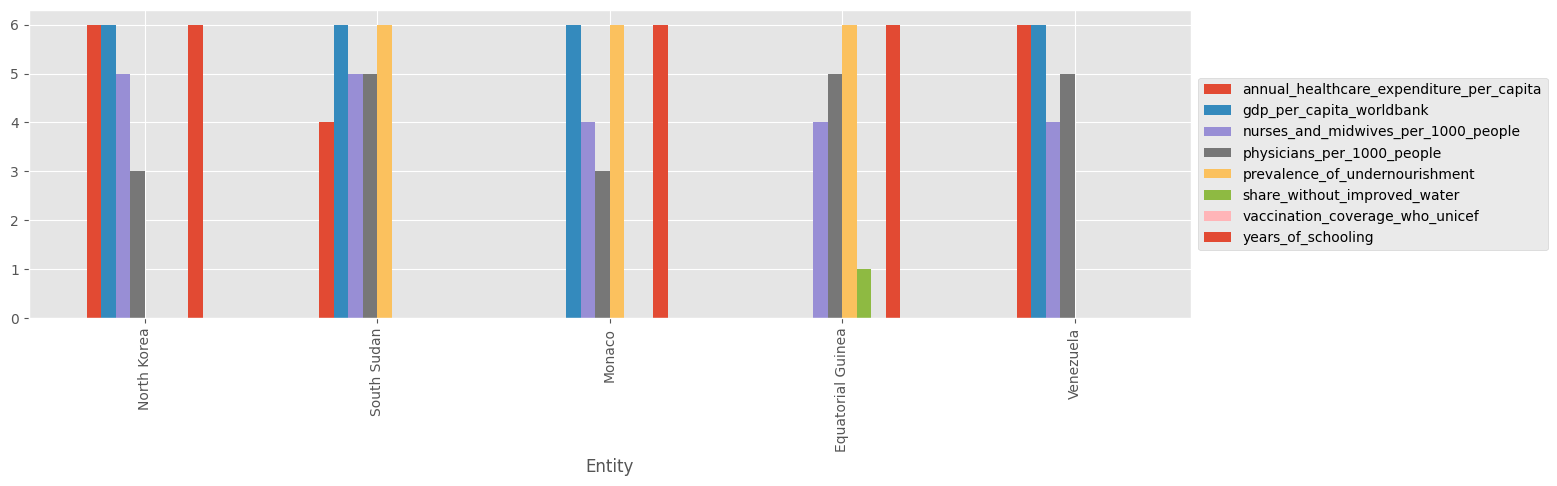

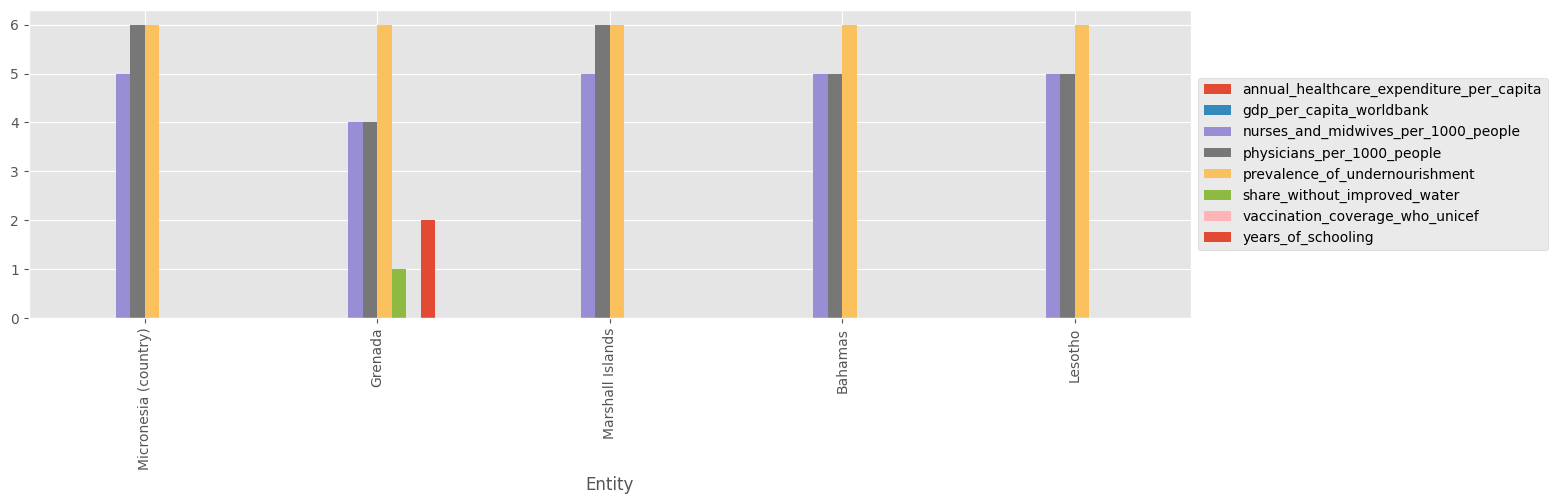

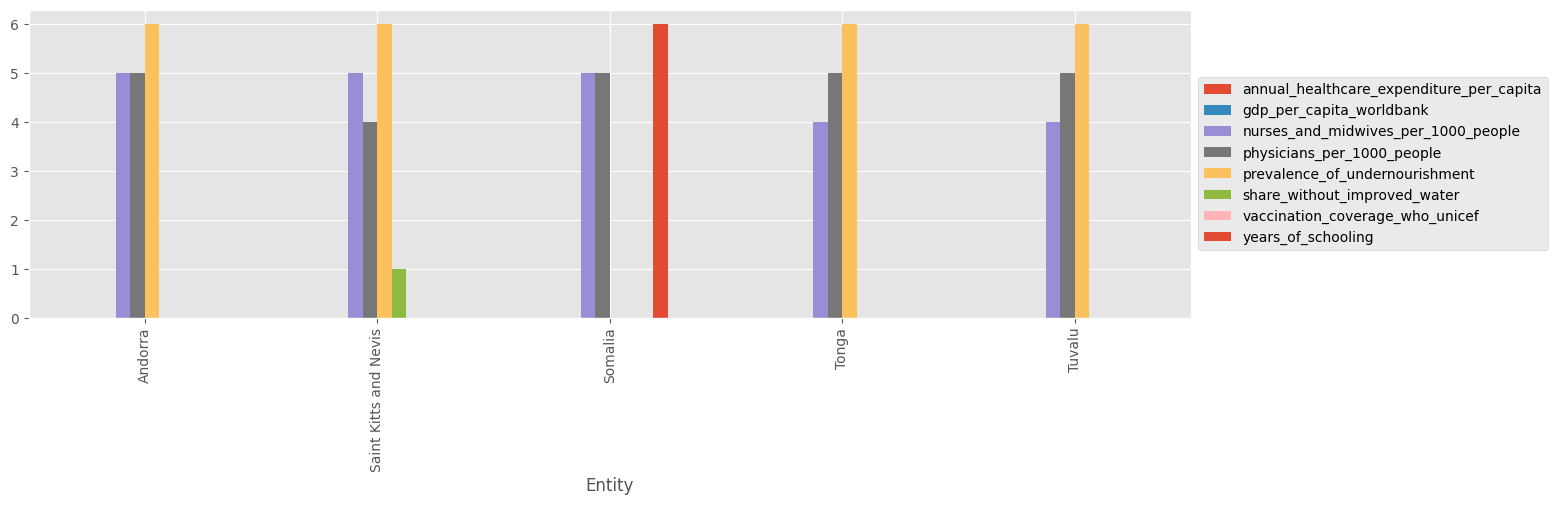

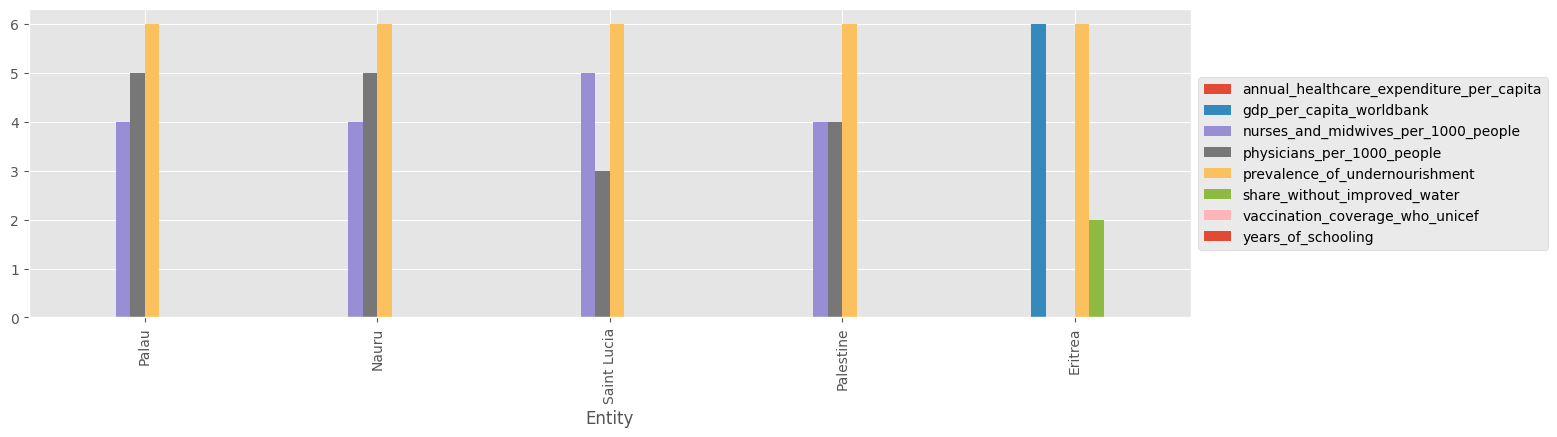

In [131]:
# get top countries with most missing values per numeric column
def missing_values_countries(row_from, row_to):
    nans_per_col_country = filtered_df_01.groupby("Entity").apply(lambda x: x.isna().sum(), include_groups=False)
    nans_per_col_country["total_missing"] = nans_per_col_country.sum(axis=1)
    most_nulls = nans_per_col_country.sort_values(by="total_missing", ascending=False)

    most_nulls.iloc[row_from:row_to].drop(columns=["child_mortality_igme", "share_of_population_urban", "total_missing"]).plot(kind="bar", figsize=(15, 4))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

missing_values_countries(0,5)
missing_values_countries(5,10)
missing_values_countries(10,15)
missing_values_countries(15,20)

### Understanding Missing Values 

In [146]:
#### Vermutung 1 - MCAR (Missing Completely At Random): Little's Test
# 2 Hypthesen: data are MCAR or data are not MCAR
# Source: https://rianneschouten.github.io/pyampute/build/html/pyampute.exploration.html
from pyampute.exploration.mcar_statistical_tests import MCARTest
test_mcar = MCARTest(method="little")
numeric_cols = filtered_df_01.select_dtypes(include=['float64'])
print(f"pvalue: { test_mcar.little_mcar_test(numeric_cols) }")

pvalue: 0.0


In [193]:
#### Vermutung 2 - Daten sind MAR (Missing at Random)
# für jede Spalte mit NaNs untersuchen, ob das Fehlen von anderen Variablen abhängt
mar_test = filtered_df_01.copy()
mar_test = mar_test.reset_index()
categ_df_wr = pd.merge(mar_test, world_regions, on="Code", how="left")

def missing_rate_by_country(variable):
    categ_df_wr[variable+"_missing"] = categ_df_wr[variable].isna().astype(int)
    missing_by_country = categ_df_wr.groupby('World regions according to WB')[variable+"_missing"].mean()
    print(f"\nMissing Value Rates by Country for {variable}:")
    return missing_by_country.sort_values(ascending=False)

#Fokus auf 3 columns mit höchste NaNs Anzahl
# missing rate varrierert zwischen Regionen
print(missing_rate_by_country("physicians_per_1000_people"))
print(missing_rate_by_country("nurses_and_midwives_per_1000_people"))
print(missing_rate_by_country("prevalence_of_undernourishment"))


Missing Value Rates by Country for physicians_per_1000_people:
World regions according to WB
Latin America and Caribbean (WB)                            0.505051
Sub-Saharan Africa (WB)                                     0.479167
East Asia and Pacific (WB)                                  0.461111
North America (WB)                                          0.416667
Middle East, North Africa, Afghanistan and Pakistan (WB)    0.318841
South Asia (WB)                                             0.277778
Europe and Central Asia (WB)                                0.081699
Name: physicians_per_1000_people_missing, dtype: float64

Missing Value Rates by Country for nurses_and_midwives_per_1000_people:
World regions according to WB
East Asia and Pacific (WB)                                  0.405556
Sub-Saharan Africa (WB)                                     0.395833
Middle East, North Africa, Afghanistan and Pakistan (WB)    0.246377
Latin America and Caribbean (WB)                        

In [183]:
#moderate negative correlation (the higher the gdp, the less likely physicians column is missing)
categ_df_wr[['physicians_per_1000_people_missing', 'gdp_per_capita_worldbank']].corr()

,physicians_per_1000_people_missing,gdp_per_capita_worldbank
physicians_per_1000_people_missing,1.000000,-0.256974
gdp_per_capita_worldbank,-0.256974,1.000000
